<h1>2022.04.14. 강의 시간내 실습</h1>

In [47]:
import warnings

warnings.filterwarnings('ignore')

<h2>1. 파일 읽어서 데이터프레임 생성</h2>

In [48]:
import numpy as np
import pandas as pd

In [49]:
baseball = pd.read_csv("C:/ai_dataset/baseball_players.csv")

In [50]:
baseball

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


<h2>2. EDA (label 갯수 확인)</h2>

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Class')

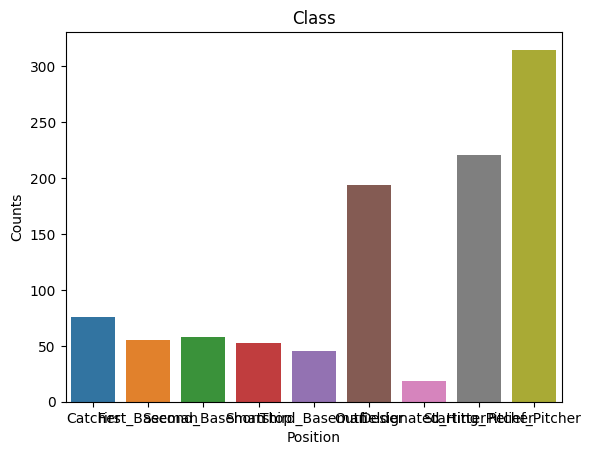

In [52]:
sns.countplot(data = baseball, x="Position")
plt.xlabel("Position")
plt.ylabel("Counts")
plt.title("Class")

<h2>3. 포시젼 분류 / 4. 포지션을 숫자로 변경</h2>

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in baseball.columns :
    baseball[i] = le.fit_transform(baseball[i])

In [54]:
baseball

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,7,15,35
1,794,3,0,7,50,625
2,817,3,0,5,45,482
3,628,3,2,5,45,645
4,199,3,2,6,23,653
...,...,...,...,...,...,...
1029,105,25,4,6,25,145
1030,997,25,4,7,15,190
1031,202,25,4,8,40,153
1032,824,25,4,8,25,496


In [55]:
x = baseball.drop('Position',axis=1)
y = baseball.Position.values

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<h3>SVM</h3>

In [57]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=10)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.313180169286578


<h3>LR</h3>

In [58]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.31559854897218864


<h3>DT</h3>

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


<h3>RF</h3>

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

1.0


<h2>5. Regression 수행</h2>

In [61]:
from sklearn.metrics import mean_squared_error

<h3>SVM</h3>

In [62]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('mse : ', mse)

mse :  2.1277984482118644


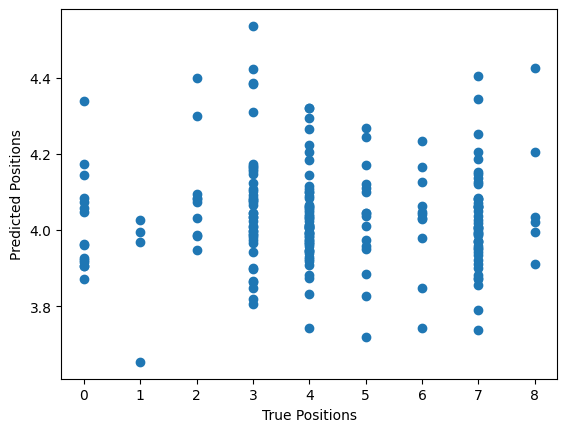

In [63]:
plt.scatter(y_test, sy_preds)
plt.xlabel("True Positions")
plt.ylabel("Predicted Positions")
plt.show()

<h3>LR</h3>

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('mse : ', mse)

mse :  2.0386277178129206


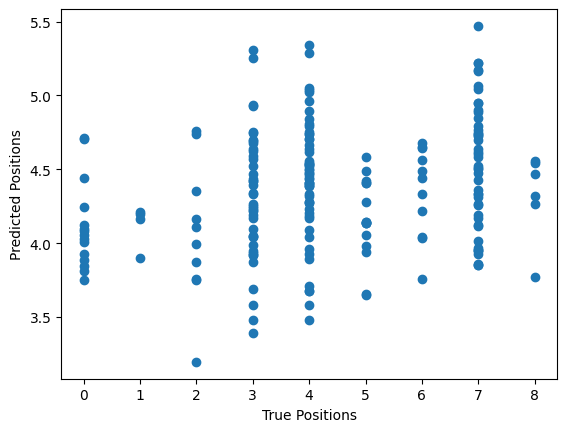

In [65]:
plt.scatter(y_test, ly_preds)
plt.xlabel("True Positions")
plt.ylabel("Predicted Positions")
plt.show()

<h3>DT</h3>

In [66]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('mse : ', mse)

mse :  2.7793232415750815


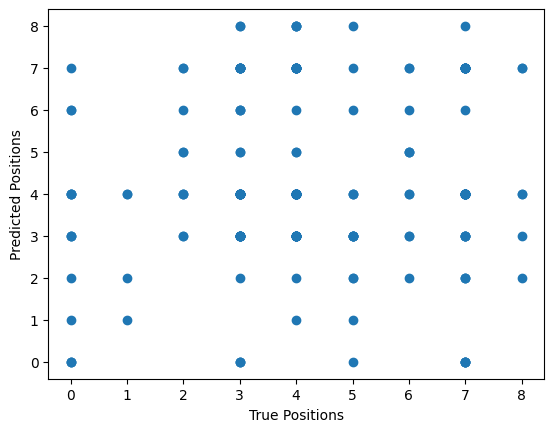

In [67]:
plt.scatter(y_test, dy_preds)
plt.xlabel("True Positions")
plt.ylabel("Predicted Positions")
plt.show()

<h3>RF</h3>

In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('mse : ', mse)

mse :  2.1956825223903462


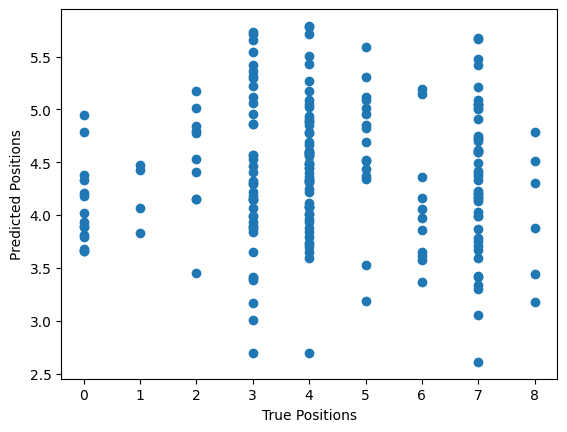

In [69]:
plt.scatter(y_test, ry_preds)
plt.xlabel("True Positions")
plt.ylabel("Predicted Positions")
plt.show()